In [8]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [9]:
columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

num, text = 0, 1
dataType = [num, text, num, text, num, text, text, text, text, text, num, num, num, text]

df = pd.read_csv("../dataset/adult.data", names= columnNames, sep=',')
df = df.replace(' ?', np.nan)

In [10]:
for idx, dType in enumerate(dataType):
    if df[columnNames[idx]].isnull().sum().sum() != 0:
        if dType == text:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mode()[0].strip(), inplace=True)
        else:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mean(), inplace=True)

### Use df['columnName'] to extract the column.

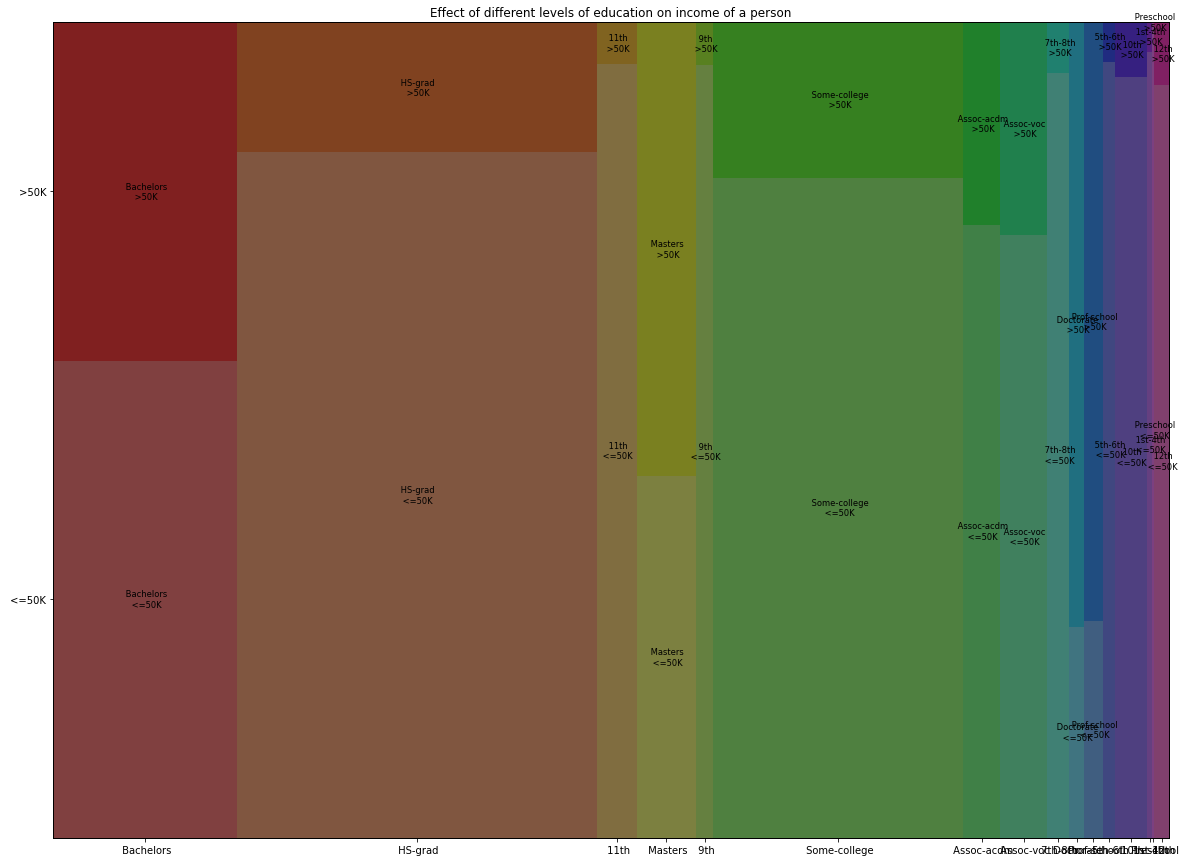

In [30]:
# NATESH TYAGI
# Using 'education' parameter to predict the income

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,15))
mosaic(df, ['education', 'income'], ax=axes, axes_label=True, 
       title='Effect of different levels of education on income of a person', gap=0)
plt.show()

In [12]:
# IGNORE

# below50 = df.loc[df['income'] == ' <=50K', 'age']
# above50 = df.loc[df['income'] == ' >50K', 'age']

# below50Counter = Counter(below50)
# above50Counter = Counter(above50)

# above50Bins = {'17-30':0, '31-45':0, '46-60':0, '61-75':0, '76-90':0}
# below50Bins = {'17-30':0, '31-45':0, '46-60':0, '61-75':0, '76-90':0}
# for key, val in above50Counter.items():
#     if 17<=key<=30:
#         above50Bins['17-30'] += val
#     elif 31<=key<=45:
#         above50Bins['31-45'] += val
#     elif 46<=key<=60:
#         above50Bins['46-60'] += val
#     elif 61<=key<=75:
#         above50Bins['61-75'] += val
#     elif 76<=key<=90:
#         above50Bins['76-90'] += val

# for key, val in below50Counter.items():
#     if 17<=key<=30:
#         below50Bins['17-30'] += val
#     elif 31<=key<=45:
#         below50Bins['31-45'] += val
#     elif 46<=key<=60:
#         below50Bins['46-60'] += val
#     elif 61<=key<=75:
#         below50Bins['61-75'] += val
#     elif 76<=key<=90:
#         below50Bins['76-90'] += val
# print(above50Bins)
# below50Bins